In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import random
import tensorflow as tf
%matplotlib inline

# LSTM, BI-LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional
from keras._tf_keras.keras.callbacks import EarlyStopping, ModelCheckpoint

2025-04-20 20:42:24.215389: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-20 20:42:24.346274: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-20 20:42:25.103644: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-20 20:42:29.125603: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv('../data/data.csv')
df.head()

,Date,BNB Open,BTC Close,BTC Open,DJI Open,DOGE Open,DXY Open,ETH Open,Gold Open,NASDAQ Open,...,US30 Open,BTC Active Addr Cnt,BTC Addr Cnt with ≥ .001% Supply,BTC Exchange Withdrawals,BTC Exchange Deposits,BTC Miner Supply,BTC Miner Revenue,BTC Difficulty,BTC Mean Block Size,BTC Total Fees
0,2014-09-18,1.99,424.3,461.1,17163.73,0.002803,84.80,11.2,1223.1,4084.51,...,3.371,191063,8893,9.743524e+06,1.065752e+07,9.222782e+08,2.127475e+06,2.982973e+10,236099.989247,5494.516757
1,2014-09-19,1.99,397.7,424.3,17267.21,0.002803,84.28,11.2,1225.6,4113.02,...,3.358,190890,8897,1.359548e+07,1.696480e+07,8.630416e+08,1.915503e+06,2.982973e+10,233777.391061,5214.342615
2,2014-09-20,1.99,411.5,397.7,17267.21,0.002803,84.28,11.2,1225.6,4113.02,...,3.358,172255,8890,1.694158e+07,1.770344e+07,7.968963e+08,1.688158e+06,2.982973e+10,224258.415205,4261.732292
3,2014-09-21,1.99,401.6,411.5,17271.71,0.002803,84.78,11.2,1216.4,4091.87,...,3.279,169941,8919,8.728492e+06,9.387692e+06,8.324557e+08,1.812817e+06,2.982973e+10,210502.045455,4235.264753
4,2014-09-22,1.99,404.1,401.6,17271.71,0.002803,84.78,11.2,1216.4,4091.87,...,3.279,200712,8905,1.089809e+07,1.050540e+07,8.117053e+08,1.645297e+06,2.982973e+10,214022.042683,3638.427361


In [3]:
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

X = df.drop(['Date', 'BTC Close'], axis=1)
y = df['BTC Close']

scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

train_size = int(len(df) * 0.7)
validation_size = int((len(df) - train_size) / 2) 

train_X, validation_X = X[0:train_size,:], X[train_size:train_size+validation_size,:]
train_y, validation_y = y[0:train_size,:], y[train_size:train_size+validation_size,:]

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
validation_X = validation_X.reshape((validation_X.shape[0], 1, validation_X.shape[1]))

**Bi-LSTM**


In [4]:
bi_lstm_model = Sequential()
bi_lstm_model.add(Bidirectional(LSTM(256, return_sequences=True, activation='relu',input_shape=(train_X.shape[1], train_X.shape[2]))))
bi_lstm_model.add(Bidirectional(LSTM(128,  activation='relu')))
bi_lstm_model.add(Dense(1))
bi_lstm_model.compile(optimizer='adam', loss='mean_absolute_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('../artifacts/best_bi_lstm_model.keras', save_best_only=True, monitor='val_loss')

bi_lstm_model.fit(train_X, train_y, epochs=100, batch_size=16,validation_data=(validation_X, validation_y),
          verbose=2, callbacks=[early_stopping, model_checkpoint])

/home/zhizhan/workspace/defifolio-paper/model/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
170/170 - 19s - 110ms/step - loss: 0.0186 - val_loss: 0.0173
Epoch 2/100
170/170 - 4s - 24ms/step - loss: 0.0083 - val_loss: 0.0151
Epoch 3/100
170/170 - 3s - 18ms/step - loss: 0.0073 - val_loss: 0.0158
Epoch 4/100
170/170 - 3s - 19ms/step - loss: 0.0070 - val_loss: 0.0143
Epoch 5/100
170/170 - 5s - 27ms/step - loss: 0.0063 - val_loss: 0.0145
Epoch 6/100
170/170 - 4s - 25ms/step - loss: 0.0062 - val_loss: 0.0140
Epoch 7/100
170/170 - 4s - 22ms/step - loss: 0.0063 - val_loss: 0.0139
Epoch 8/100
170/170 - 3s - 20ms/step - loss: 0.0058 - val_loss: 0.0137
Epoch 9/100
170/170 - 4s - 22ms/step - loss: 0.0057 - val_loss: 0.0137
Epoch 10/100
170/170 - 4s - 22ms/step - loss: 0.0057 - val_loss: 0.0137
Epoch 11/100
170/170 - 4s - 22ms/step - loss: 0.0059 - val_loss: 0.0132
Epoch 12/100
170/170 - 4s - 21ms/step - loss: 0.0052 - val_loss: 0.0135
Epoch 13/100
170/170 - 3s - 18ms/step - loss: 0.0051 - val_loss: 0.0141
Epoch 14/100
170/170 - 2s - 9ms/step - loss: 0.0053 - val_loss: 0.0127


In [5]:
df_test = pd.DataFrame()
df_test['Date'] = pd.to_datetime(df['Date'][train_size+validation_size:len(df)])
df_test

,Date
3287,2023-09-18
3288,2023-09-19
3289,2023-09-20
3290,2023-09-21
3291,2023-09-22
...,...
3863,2025-04-16
3864,2025-04-17
3865,2025-04-18
3866,2025-04-19


In [6]:
# predict using model with df_test_dates
test_X = X[train_size+validation_size:len(df),:]
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
prediction = bi_lstm_model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

inv_test_prediction = np.concatenate((prediction, test_X[:, 1:]), axis=1)
inv_test_prediction = scaler.inverse_transform(inv_test_prediction)
inv_test_prediction = inv_test_prediction[:,0]
df_test['Bi-LSTM Predicted Price'] = inv_test_prediction

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step


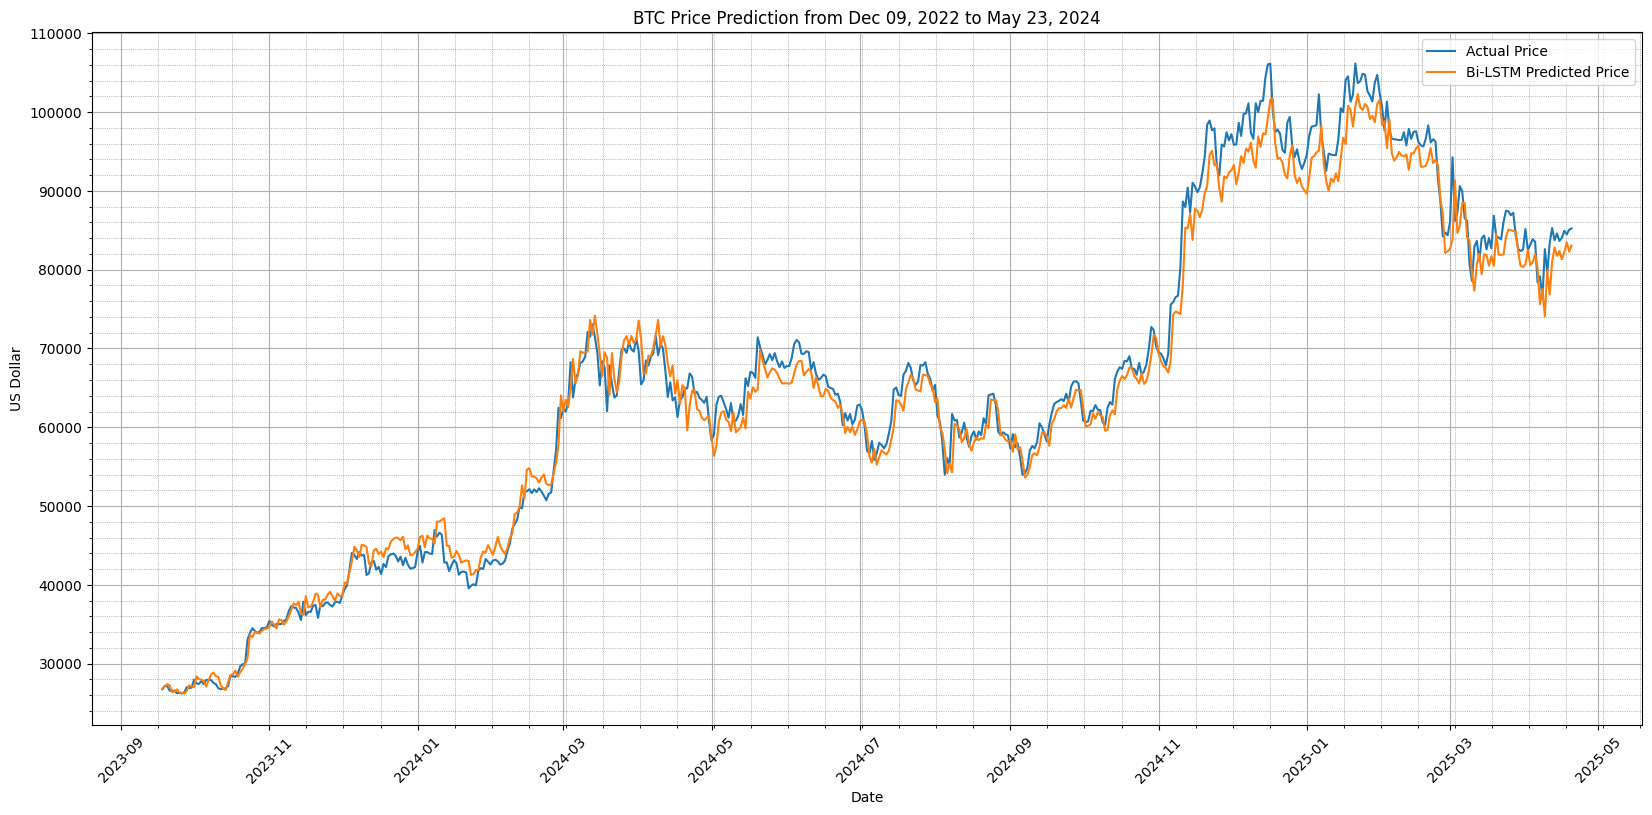

In [7]:
plt.figure(figsize=(20, 9))
plt.plot(df_test['Date'], df['BTC Close'][train_size+validation_size:len(df)], label='Actual Price')
plt.plot(df_test['Date'], df_test['Bi-LSTM Predicted Price'], label='Bi-LSTM Predicted Price')

plt.title('BTC Price Prediction from Dec 09, 2022 to May 23, 2024')

plt.ylabel('US Dollar')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()

plt.gca().yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
plt.gca().xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())

plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5)
plt.grid(which='major')

plt.show()

In [8]:
# print mae, rmse, r2 score of each model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('\nBi-LSTM') 
print('MAE:', mean_absolute_error(df['BTC Close'][train_size+validation_size:len(df)], df_test['Bi-LSTM Predicted Price']))
print('RMSE:', np.sqrt(mean_squared_error(df['BTC Close'][train_size+validation_size:len(df)], df_test['Bi-LSTM Predicted Price'])))
print('R2 Score:', r2_score(df['BTC Close'][train_size+validation_size:len(df)], df_test['Bi-LSTM Predicted Price']))
print('MAPE:', np.mean(np.abs((df['BTC Close'][train_size+validation_size:len(df)] - df_test['Bi-LSTM Predicted Price']) / df['BTC Close'][train_size+validation_size:len(df)])))



Bi-LSTM
MAE: 2017.651185521692
RMSE: 2654.047010954334
R2 Score: 0.9843129297865748
MAPE: 0.02974340030568307


In [9]:
bi_lstm_model.save('../artifacts/bi_lstm_model.h5')

Bi-LSTM Total Trades: 32 ,Bi-LSTM Win Trades: 15 ,Bi-LSTM Loss Trades: 17 ,Bi-LSTM Win Ratio: 0.46875 ,Bi-LSTM Loss Ratio: 0.53125 ,Bi-LSTM Win/Loss Ratio: 0.8823529411764706
Buy and Hold Sharpe Ratio: 1.81
Bi-LSTM Sharpe Ratio: 2.13
Buy and Hold Peak Value: 3961.4434035800577
Buy and Hold Trough Value: 978.4045590325026
Buy and Hold Maximum Drawdown: -0.7530181655130316
Bi-LSTM Peak Value: 2448.555702609783
Bi-LSTM Trough Value: 944.2450343290182
Bi-LSTM Maximum Drawdown: -0.6143665290838193
          Date      Bi-LSTM  Buy and Hold
580 2025-04-20  1379.954699   2180.754266


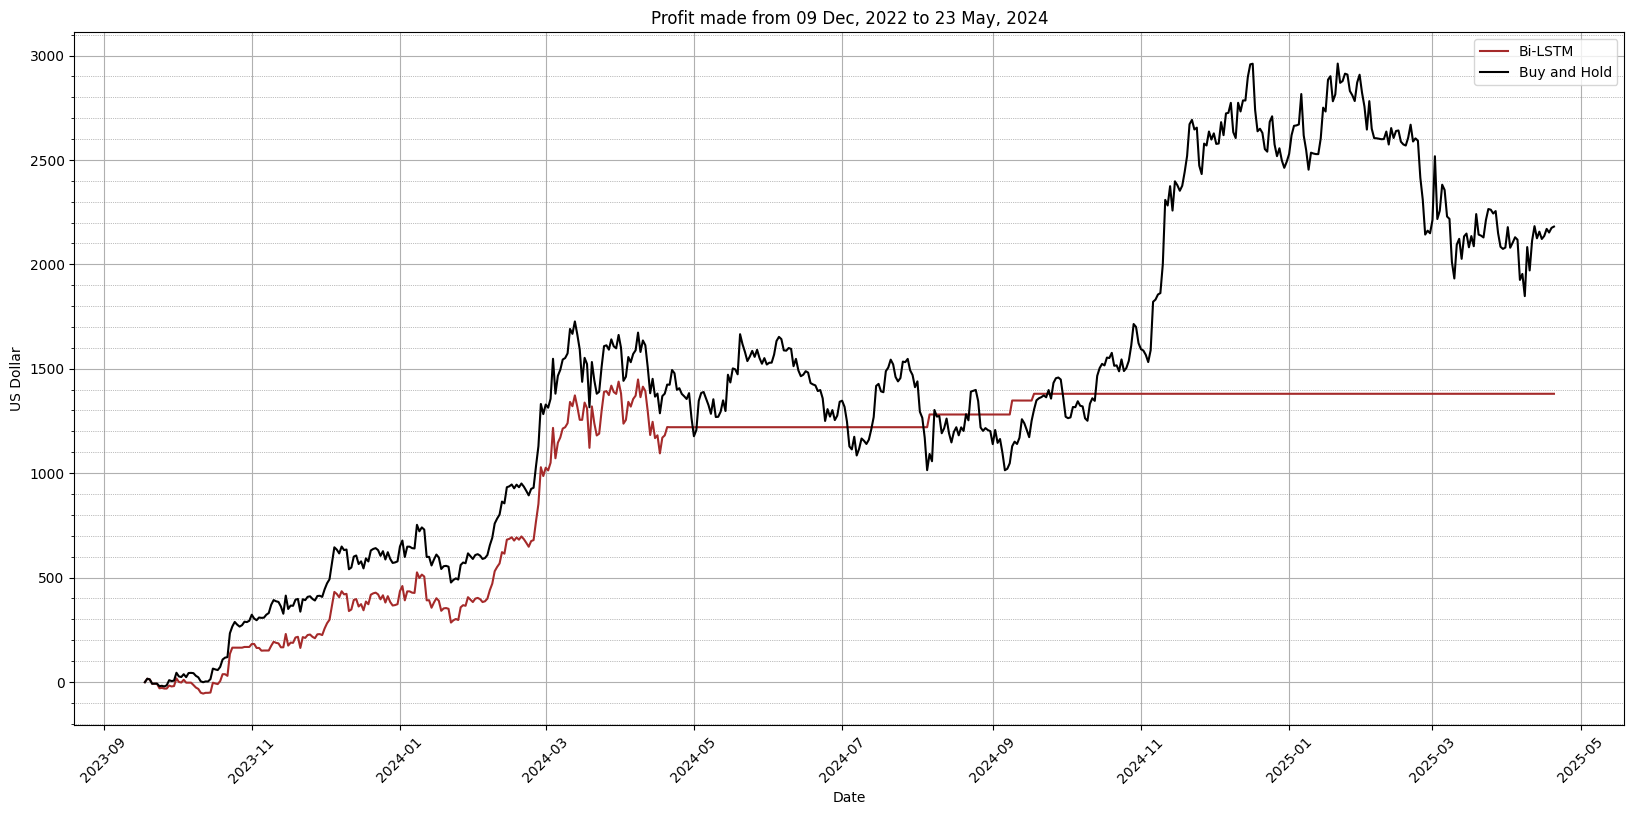

In [10]:
# convert to dictionary
df_calculate = pd.DataFrame()
df_calculate['Date'] = df_test['Date']
df_calculate['Open'] = df['BTC Open']
df_calculate['Actual Close'] = df['BTC Close'][train_size+validation_size:len(df)]
df_calculate['Bi-LSTM Predicted Close'] = df_test['Bi-LSTM Predicted Price']

d = df_calculate.to_dict('records')

inital_shares = 1000.0/ d[0]['Open'] * 0.995
peak_value = 1000
trough_value  = 1000

bi_lstm_cash = 1000.0
bi_lstm_shares = 0
bi_lstm_total_trades = 0
bi_lstm_win_trades = 0
bi_lstm_peak_value = 1000
bi_lstm_trough_value = 1000


daily_reports = []
monthly_reports = []

# Loop through each day, skip first day
for i in range(0, len(d)):
    data = d[i]

    bi_lstm_price_change = data['Bi-LSTM Predicted Close'] - data['Open']
    # if price change is positive, buy shares
    if bi_lstm_price_change > 0 and bi_lstm_cash > 0:
        bi_lstm_shares = (bi_lstm_cash / data['Open']) * 0.995
        bi_lstm_cash = 0
        bi_lstm_total_trades += 1
        if data['Actual Close'] * 0.995 > data['Open']:
            bi_lstm_win_trades += 1
    elif bi_lstm_price_change < 0 and bi_lstm_shares > 0:
        bi_lstm_cash = bi_lstm_shares * data['Open'] * 0.995 # 0.3% trading fee and 0.2% slippage
        bi_lstm_shares = 0
        bi_lstm_total_trades += 1
        if data['Actual Close'] < data['Open'] * 0.995:
            bi_lstm_win_trades += 1



    # calculate peak and trough values
    buy_and_hold_value = inital_shares * data['Actual Close'] * 0.995
    peak_value = max(peak_value, buy_and_hold_value)
    trough_value = min(trough_value, buy_and_hold_value)

    bi_lstm_trade_value = (bi_lstm_shares * data['Actual Close'] * 0.995) + bi_lstm_cash
    bi_lstm_peak_value = max(bi_lstm_peak_value, bi_lstm_trade_value)
    bi_lstm_trough_value = min(bi_lstm_trough_value, bi_lstm_trade_value)

    # print balances
    buy_and_hold = (inital_shares * data['Actual Close'] * 0.995) - 1000
    bi_lstm_trade =  ((bi_lstm_shares * data['Actual Close'] * 0.995) + bi_lstm_cash) - 1000

    daily_reports.append({
        'Date': data['Date'],
        'Bi-LSTM': bi_lstm_trade,
        'Buy and Hold': buy_and_hold,
    })

    if data['Date'].day == 1:
        monthly_reports.append({
            'Date': data['Date'],
            'Bi-LSTM': bi_lstm_trade,
            'Buy and Hold': buy_and_hold,
        })

df_monthly_reports = pd.DataFrame(monthly_reports)

print('Bi-LSTM Total Trades:', bi_lstm_total_trades, ',Bi-LSTM Win Trades:', bi_lstm_win_trades,
        ',Bi-LSTM Loss Trades:', bi_lstm_total_trades - bi_lstm_win_trades,
        ',Bi-LSTM Win Ratio:', bi_lstm_win_trades / bi_lstm_total_trades if bi_lstm_total_trades >0 else 0,
        ',Bi-LSTM Loss Ratio:', (1 - (bi_lstm_win_trades / bi_lstm_total_trades)) if bi_lstm_total_trades >0 else 0,
        ',Bi-LSTM Win/Loss Ratio:', (bi_lstm_win_trades / (bi_lstm_total_trades - bi_lstm_win_trades)) if bi_lstm_total_trades >0 else 0)

bi_lstm_returns = np.array([report['Bi-LSTM'] for report in daily_reports])
buy_and_hold_returns = np.array([report['Buy and Hold'] for report in daily_reports])



bi_lstm_avg_return = np.mean(bi_lstm_returns)
buy_and_hold_avg_return = np.mean(buy_and_hold_returns)


# Calculate the standard deviation of the returns for each strategy
bi_lstm_std_dev = np.std(bi_lstm_returns)
buy_and_hold_std_dev = np.std(buy_and_hold_returns)


# Set the risk-free rate (4.8% MPY) (21 trading days) (0.223% DPY)
risk_free_returns = 2.23

# Calculate the Sharpe ratio for each strategy
bi_lstm_sharpe_ratio = (bi_lstm_avg_return - risk_free_returns) / bi_lstm_std_dev
buy_and_hold_sharpe_ratio = (buy_and_hold_avg_return - risk_free_returns) / buy_and_hold_std_dev


print(f"Buy and Hold Sharpe Ratio: {buy_and_hold_sharpe_ratio:.2f}")
print(f"Bi-LSTM Sharpe Ratio: {bi_lstm_sharpe_ratio:.2f}")


# print peak, trough and maximum drawdown value for each strategy
print('Buy and Hold Peak Value:', peak_value)
print('Buy and Hold Trough Value:', trough_value)
print('Buy and Hold Maximum Drawdown:', (trough_value - peak_value) / peak_value)


print('Bi-LSTM Peak Value:', bi_lstm_peak_value)
print('Bi-LSTM Trough Value:', bi_lstm_trough_value)
print('Bi-LSTM Maximum Drawdown:', (bi_lstm_trough_value - bi_lstm_peak_value) / bi_lstm_peak_value)


# print last row of daily reports
df_daily_reports = pd.DataFrame(daily_reports)
print(df_daily_reports.tail(1))

# show line plot of monthly profit
plt.figure(figsize=(20, 9))
plt.title('Profit made from 09 Dec, 2022 to 23 May, 2024')
plt.plot(df_daily_reports['Date'], df_daily_reports['Bi-LSTM'], label='Bi-LSTM', color='brown')
plt.plot(df_daily_reports['Date'], df_daily_reports['Buy and Hold'], label='Buy and Hold', color='black')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('US Dollar')
plt.legend()

# set AutoMinorLocator
plt.gca().yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5)
plt.grid(which='major')
plt.show()

# export daily and monthly report to csv
df_daily_reports = pd.DataFrame(daily_reports)
df_daily_reports.to_csv('./daily_reports.csv', index=False)

df_monthly_reports = pd.DataFrame(monthly_reports)
df_monthly_reports.to_csv('./monthly_reports.csv', index=False)